---
title: "Shading regions on a plot"
author: "Damien Martin"
date: "2024-04-29 13:00"
categories: [data-vis, plotnine, snippet]
image: "image.jpg"
description: "Showed how to shade a region on a plot"
---

# Problem

We want to shade a region on a plot. Note that `matplotlib` and `altair` can have annoyances about finding the "edges" of the range.

# Solution

- Use `p9.geom_rect` with `p9.aes(xmin=..., xmax=..., ymin=..., ymax=...)` as its first argument
- Use the alpha argument to make the box semi-transparent

# Example

We will make a normal distribution, with the negative region blocked out

In [1]:
import pandas as pd
import plotnine as p9
import scipy.stats
import numpy as np

In [2]:
x_values = np.linspace(-2, 6, 100)
y_values = scipy.stats.norm(2, 1).pdf(x_values)

shifted_gaussian_df = pd.DataFrame({'x': x_values, 'density': y_values})
shifted_gaussian_df.head()

,x,density
0,-2.000000,0.000134
1,-1.919192,0.000184
2,-1.838384,0.000252
3,-1.757576,0.000343
4,-1.676768,0.000463


Let's start by just plotting the normal distribution:

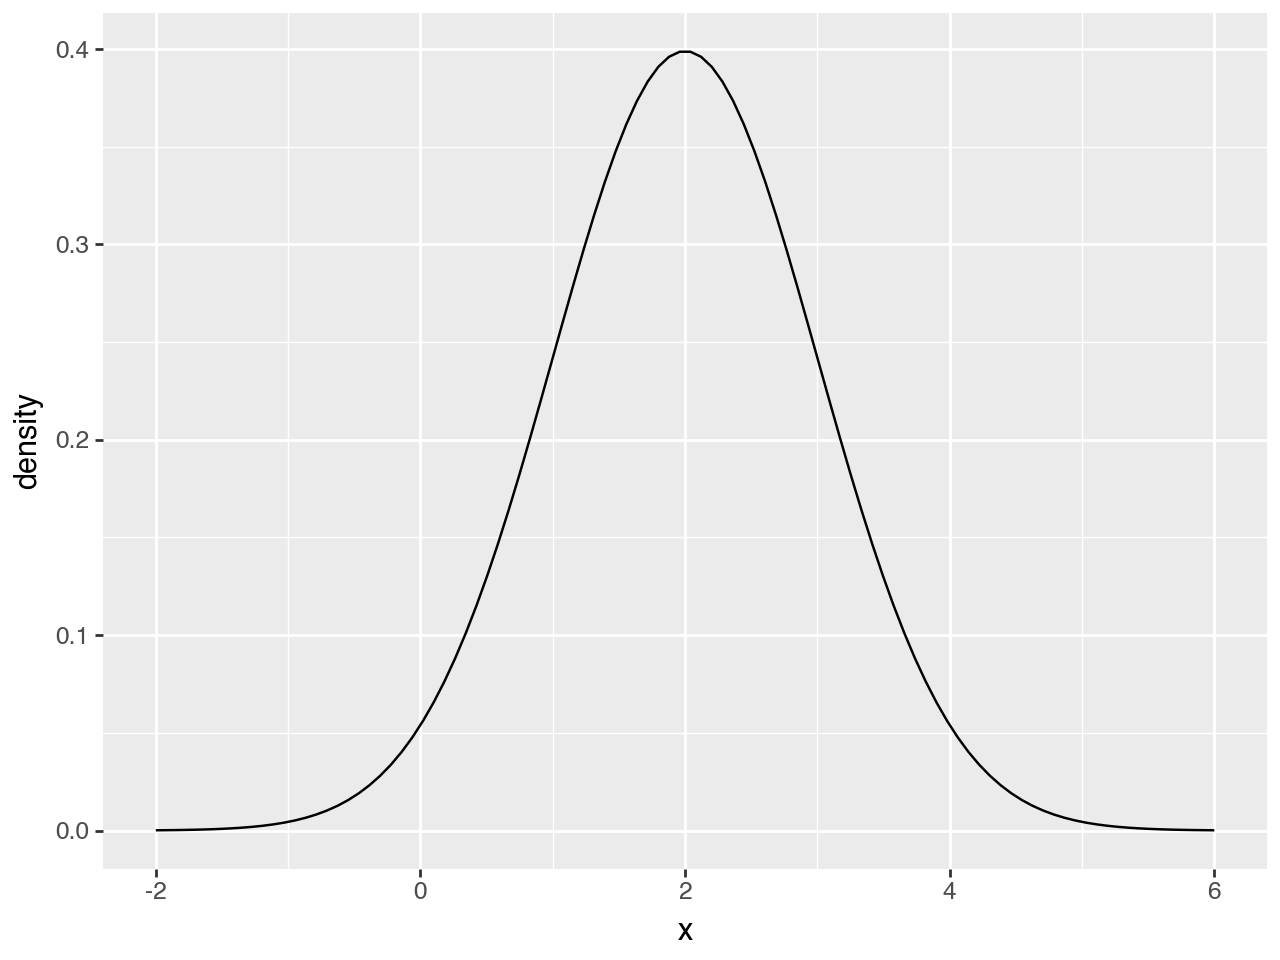

In [3]:
(
    p9.ggplot(shifted_gaussian_df, p9.aes(x='x', y='density'))
    + p9.geom_line()
)

Let's shade the area of the plot with $x < 0$

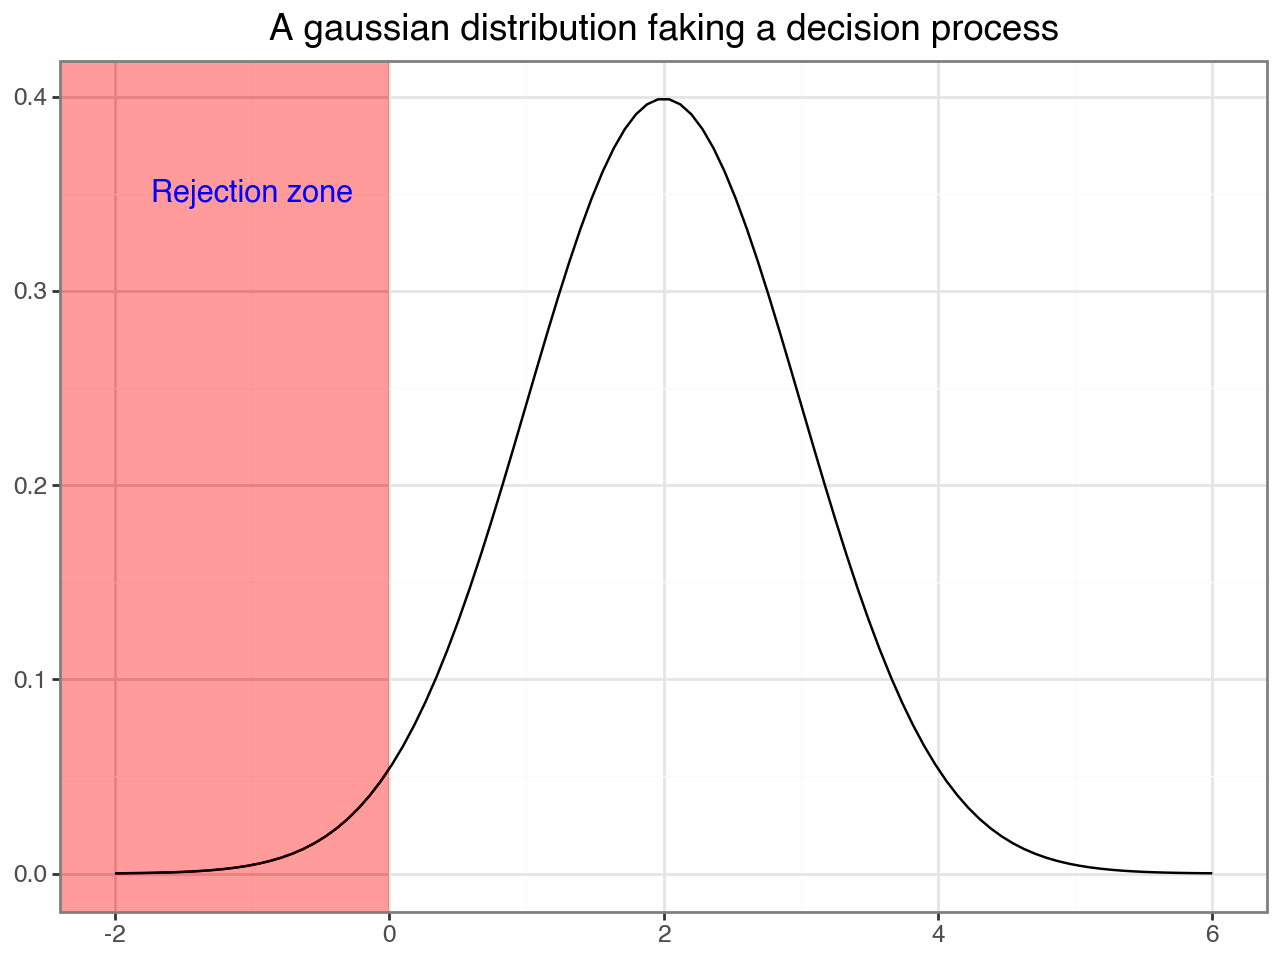

In [5]:
(
    p9.ggplot(shifted_gaussian_df, p9.aes(x='x', y='density'))
    + p9.geom_line()
    + p9.geom_rect(
        mapping=p9.aes(xmin=float("-inf"), xmax=0, ymin=float("-inf"), ymax=float("inf")),
        alpha=0.005, fill='red'
    )
    + p9.theme_bw()
    # Add some text as well
    + p9.annotate("text", x=-1, y=0.35, label="Rejection zone", color="blue")
    + p9.labs(x="", y="", title="A gaussian distribution faking a decision process")
)

If you want the area under the curve instead, it looks a little different:

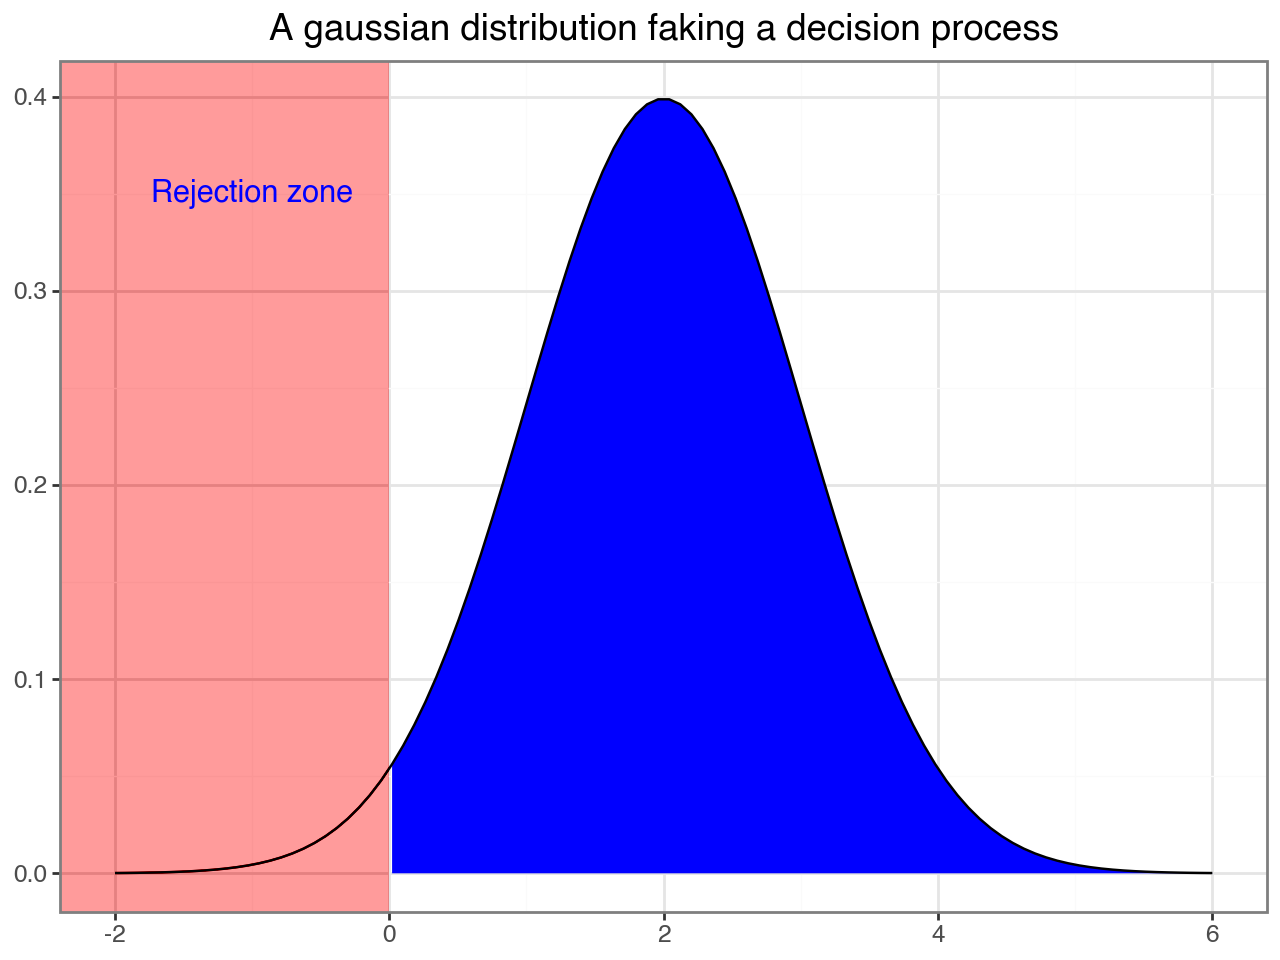

In [10]:
(
    p9.ggplot(shifted_gaussian_df, p9.aes(x='x', y='density'))
    + p9.geom_area(data=shifted_gaussian_df[shifted_gaussian_df['x'] >= 0], fill="blue")
    + p9.geom_line()
    + p9.geom_rect(
        mapping=p9.aes(xmin=float("-inf"), xmax=0, ymin=float("-inf"), ymax=float("inf")),
        alpha=0.005, fill='red'
    )
    + p9.theme_bw()
    # Add some text as well
    + p9.annotate("text", x=-1, y=0.35, label="Rejection zone", color="blue")
    + p9.labs(x="", y="", title="A gaussian distribution faking a decision process")
)